# Necassary Imports

In [7]:
# Imports
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))

import re
#import inflect
#from num2words import num2words
from nltk.corpus import stopwords
from collections import Counter

import sklearn

from gensim.models import Word2Vec
from sklearn.decomposition import NMF
from sklearn.model_selection import ParameterSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV

from nltk.stem import WordNetLemmatizer
import nltk 

[nltk_data] Downloading package punkt to C:\Users\Orchid
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Orchid
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Orchid
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Necassary preprocessing steps

In [9]:
# Import data
df = pd.read_csv('us_equities_news_dataset.csv')

In [10]:
# Filter out Nvidia articles
nvidia_df = df[df['title'].str.contains('NVIDIA|NVDA', case=False, na=False) |
               df['content'].str.contains('NVIDIA|NVDA', case=False, na=False) |
               df['ticker'].str.contains('NVIDIA|NVDA', case=False, na=False)]

In [11]:
print(len(nvidia_df))

3464


In [12]:
#Pre processing steps
def preprocess_text_iteration1(text):
    text = text.strip()
    # Replace URLs with an empty string
    re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    words = word_tokenize(text.lower())
    #check if the word is alpha numeric
    alpha_words = [word for word in words if word.isalpha()]
    #remove numbers
    numbers_words = [word for word in alpha_words if not word.isdigit()]
    return numbers_words

# apply preprocessing
nvidia_df['content'] = nvidia_df['content'].apply(preprocess_text_iteration1)

C:\Users\Orchid X\AppData\Local\Temp\ipykernel_27908\2317645968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_df['content'] = nvidia_df['content'].apply(preprocess_text_iteration1)


In [13]:
#create a document term matrix
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')


dtm = tfidf.fit_transform(nvidia_df['content'].apply(lambda x: ' '.join(x)))
print(dtm.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# train LDAModel
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=7,random_state=42)
nmf_model.fit(dtm)

# get topics

print(len(tfidf.get_feature_names_out()))
print('\n')
print(len(nmf_model.components_))
print('\n')
print(len(nmf_model.components_[0]))

# single_topic = nmf_model.components_[0]


# top_word_indices = single_topic.argsort()[-10:]
# for index in top_word_indices:
#     print(tfidf.get_feature_names()[index])



19328


7


19328


In [35]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['strong', 'esp', 'market', 'nasdaq', 'estimates', 'semiconductor', 'current', 'year', 'buy', 'estimate', 'industry', 'research', 'stock', 'company', 'growth', 'investment', 'rank', 'stocks', 'earnings', 'zacks']


THE TOP 15 WORDS FOR TOPIC #1
['rose', 'stock', 'shares', 'past', 'trade', 'day', 'com', 'nasdaq', 'days', 'investing', 'range', 'start', 'session', 'highest', 'volume', 'exchange', 'lowest', 'seven', 'gmt', 'traded']


THE TOP 15 WORDS FOR TOPIC #2
['dow', 'dollar', 'thursday', 'investors', 'trading', 'oil', 'year', 'trump', 'nyse', 'said', 'day', 'friday', 'nasdaq', 'fed', 'trade', 'market', 'index', 'china', 'week', 'percent']


THE TOP 15 WORDS FOR TOPIC #3
['ago', 'margin', 'reported', 'operating', 'cash', 'share', 'non', 'earnings', 'fiscal', 'estimate', 'cents', 'consensus', 'gaap', 'billion', 'zacks', 'company', 'revenues', 'year', 'million', 'quarter']


THE TOP 15 WORDS FOR TOPIC #4
['baidu', 'chips', 'cloud', 'platform', 'companies', 

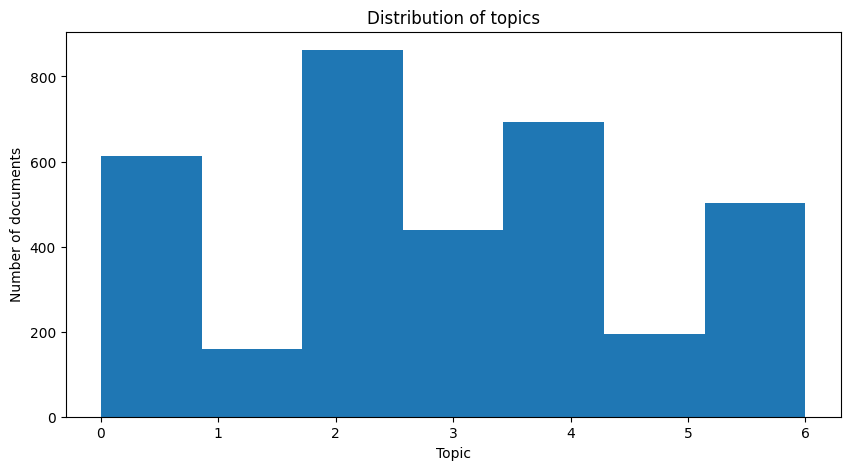

In [28]:

# plot the distribution of topics
plt.figure(figsize=(10, 5))
plt.hist(topic_results.argmax(axis=1), bins=7)
plt.xlabel('Topic')
plt.ylabel('Number of documents')
plt.title('Distribution of topics')
plt.show()


In [29]:
dtm.shape


(3464, 19328)

In [23]:

topic_results = nmf_model.transform(dtm)

print(topic_results)

[[1.06998676e-03 6.81523462e-05 9.57666728e-02 ... 0.00000000e+00
  2.18873852e-03 9.41613946e-04]
 [1.48124131e-02 9.40288374e-03 4.67698483e-02 ... 1.47042309e-02
  0.00000000e+00 1.52923238e-03]
 [5.35909892e-04 1.26836322e-02 7.96419834e-02 ... 2.72395400e-02
  5.41699935e-02 0.00000000e+00]
 ...
 [1.76512765e-02 4.85123771e-03 1.23771500e-02 ... 0.00000000e+00
  0.00000000e+00 1.00340399e-01]
 [1.49511078e-01 2.85343312e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.08662733e-01 3.13233468e-03 1.12153986e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [30]:
topic_results[0]


array([1.06998676e-03, 6.81523462e-05, 9.57666728e-02, 0.00000000e+00,
       0.00000000e+00, 2.18873852e-03, 9.41613946e-04])

In [31]:
topic_results[0].round(2)


array([0. , 0. , 0.1, 0. , 0. , 0. , 0. ])

In [32]:
topic_results[0].argmax()


2

In [33]:
topic_results.argmax(axis=1)


array([2, 2, 2, ..., 6, 0, 0], dtype=int64)

In [34]:
nvidia_df['Topic'] = topic_results.argmax(axis=1)
nvidia_df.head(10)

C:\Users\Orchid X\AppData\Local\Temp\ipykernel_27908\3965545313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_df['Topic'] = topic_results.argmax(axis=1)


,id,ticker,title,category,content,release_date,provider,url,article_id,Topic
24,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,"[ecb, effects, the, move, in, the, euro, was, ...",2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,2
32,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,"[stocks, to, watch, march, trading, session, s...",2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,2
57,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,"[investing, com, a, rout, in, apple, and, face...",2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,2
78,221593,UBER,The Zacks Analyst Blog Highlights Advanced Mi...,opinion,"[for, immediate, releasechicago, il, january, ...",2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277,4
82,221597,UBER,The Best Of CES 2020 Revised,opinion,"[with, companies, bringing, their, innovations...",2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,4
99,221614,UBER,The Best Of CES 2020,opinion,"[with, companies, bringing, their, innovations...",2020-01-10,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200498063,4
133,221648,UBER,For Most U S Major Indices 2019 Has Been Grea...,opinion,"[when, trading, opened, in, investors, were, j...",2019-12-30,Charley Blaine/Investing.com,https://www.investing.com/analysis/for-most-us...,200495364,5
186,221701,UBER,Japan 2020 Olympics Set To Showcase A New Era ...,opinion,"[excitement, is, building, up, for, the, summe...",2019-12-02,Zacks Investment Research,https://www.investing.com/analysis/japan-2020-...,200489212,4
187,221702,UBER,The Zacks Analyst Blog Highlights Toyota Moto...,opinion,"[for, immediate, releasechicago, il, december,...",2019-12-02,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200489587,4
196,221711,UBER,NVIDIA Greenbrier Uber Amazon And Apple Hig...,opinion,"[for, immediate, releasechicago, il, november,...",2019-11-25,Zacks Investment Research,https://www.investing.com/analysis/nvidia-gree...,200488165,3


In [37]:
print(nvidia_df['content'][24])

['ecb', 'effects', 'the', 'move', 'in', 'the', 'euro', 'was', 'huge', 'falling', 'over', 'pips', 'huge', 'but', 'the', 'most', 'important', 'piece', 'here', 'is', 'that', 'the', 'euro', 'broke', 'essential', 'support', 'at', 'i', 'wrote', 'up', 'my', 'thoughts', 'on', 'why', 'the', 'euro', 'could', 'even', 'fall', 'to', 'parity', 'and', 'why', 'the', 'fed', 'may', 'need', 'to', 'cut', 'rates', 'later', 'this', 'year', 'draghi', 'was', 'very', 'dovish', 'today', 'with', 'his', 'outlook', 'so', 'much', 'so', 'that', 'german', 'bunds', 'fell', 'to', 'around', 'bps', 'from', 'bps', 'our', 'year', 'fell', 'to', 'a', 'break', 'below', 'sends', 'the', 'year', 'back', 'to', 'its', 'december', 'lows', 'over', 'time', 'investors', 'should', 'come', 'to', 'realize', 'that', 'rates', 'will', 'remain', 'low', 'and', 'that', 'the', 'fed', 'will', 'need', 'to', 'stay', 'on', 'hold', 'to', 'avoid', 'having', 'the', 'dollar', 'strengthen', 'too', 'much', 'should', 'the', 'dollar', 'rise', 'it', 'will',